# LUNG CANCER

In [106]:
import os
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score, mean_absolute_error , mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

In [107]:
base_dir = os.getcwd()  # 'C:/Users/loved/mulit_disease_model/multi_disease_model/notebook'
file_path = os.path.join(base_dir, '..', 'dataset', 'lung cancer.csv')
lung_cancer = pd.read_csv(file_path)
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [108]:
lung_cancer.shape

(309, 16)

In [109]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [110]:
lung_cancer.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [111]:
# Rename columns
lung_cancer.rename(columns={
    "GENDER": "gender",
    "SMOKING": "smoking",
    "YELLOW FINGERS": "yellow_fingers",
    "ANXIETY": "anxiety",
    "PEER PRESSURE": "peer_pressure",
    "CHRONIC DISEASE": "chronic_disease",
    "FATIGUE": "fatigue",
    "ALLERGY": "allergy",
    "WHEEZING": "wheezing",
    "ALCOHOL CONSUMING": "alcohol_consuming",
    "COUGHING": "coughing",
    "SHORTNESS OF BREATH": "shortness_of_breath",
    "SWALLOWING DIFFICULTY": "swallowing_difficulty",
    "CHEST PAIN": "chest_pain",
    "AGE": "age"
}, inplace=True)


In [112]:
lung_cancer.describe()

,age,smoking,YELLOW_FINGERS,anxiety,PEER_PRESSURE,chronic_disease,FATIGUE,ALLERGY,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [113]:
#label_encoder = preprocessing.LabelEncoder()

#lung_cancer["GENDER"] = label_encoder.fit_transform(lung_cancer["GENDER"])
#lung_cancer["LUNG_CANCER"] = label_encoder.fit_transform(lung_cancer["LUNG_CANCER"])

In [114]:
print(lung_cancer.gender.value_counts())

gender
M    162
F    147
Name: count, dtype: int64


In [115]:
lung_cancer.replace({"GENDER": {"M": 0, "F": 1}}, inplace = True)

In [116]:
print(lung_cancer.LUNG_CANCER.value_counts())

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64


In [117]:
lung_cancer.replace({"LUNG_CANCER": {"NO": 0, "YES": 1}}, inplace = True)

In [118]:
lung_cancer.head()

,gender,age,smoking,YELLOW_FINGERS,anxiety,PEER_PRESSURE,chronic_disease,FATIGUE,ALLERGY,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [119]:
lung_cancer.columns

Index(['gender', 'age', 'smoking', 'YELLOW_FINGERS', 'anxiety',
       'PEER_PRESSURE', 'chronic_disease', 'FATIGUE ', 'ALLERGY ', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'LUNG_CANCER'],
      dtype='object')

In [120]:
lung_cancer = lung_cancer[['gender', 'age', 'smoking', 'YELLOW_FINGERS', 'anxiety',
       'PEER_PRESSURE', 'chronic_disease', 'FATIGUE ', 'ALLERGY ', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'LUNG_CANCER']]

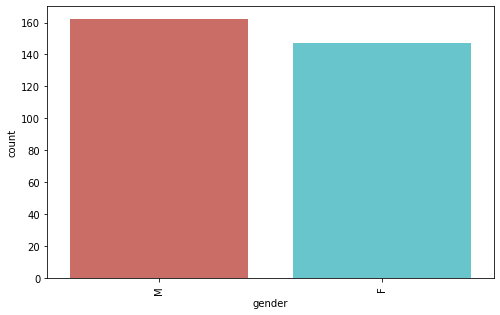

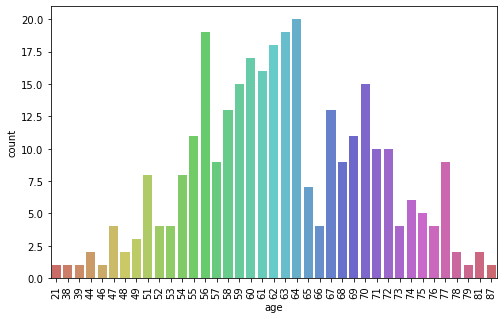

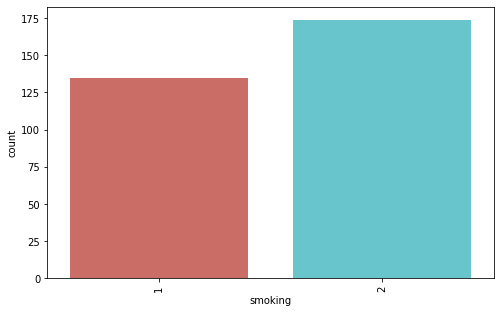

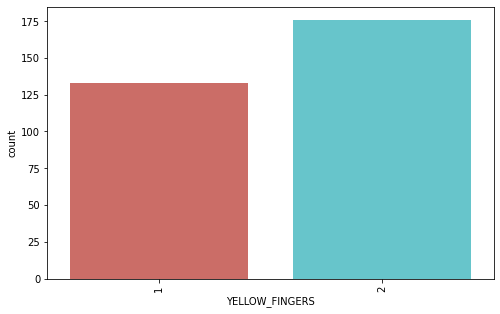

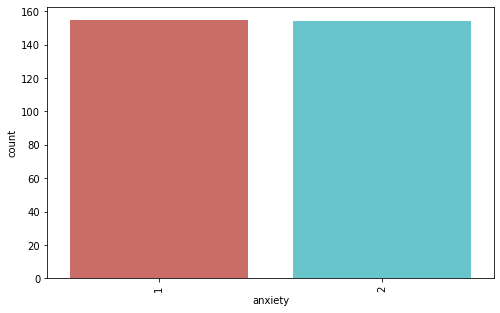

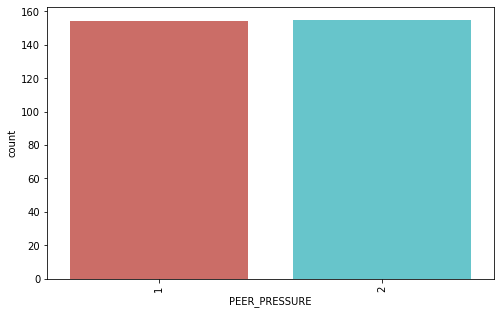

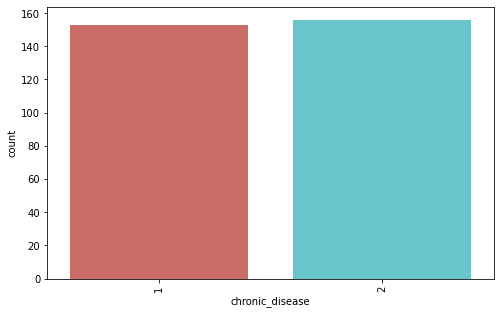

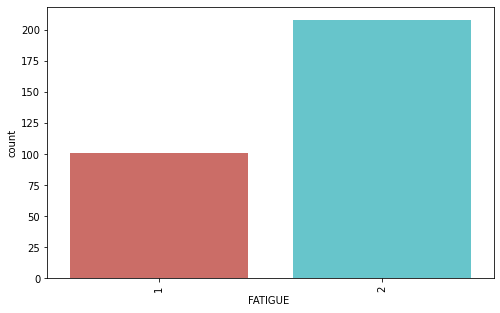

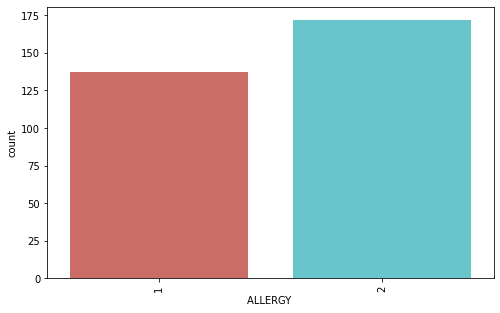

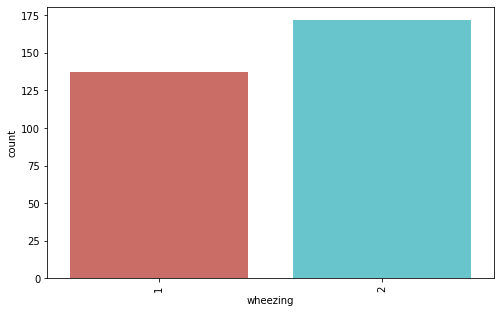

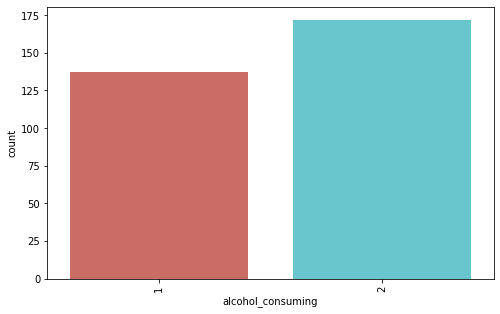

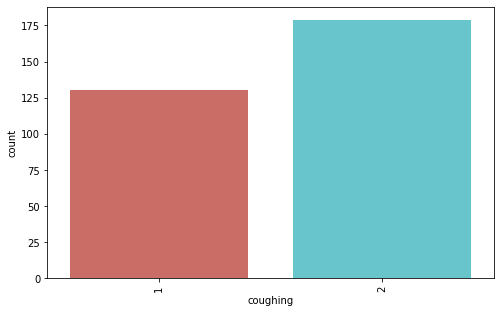

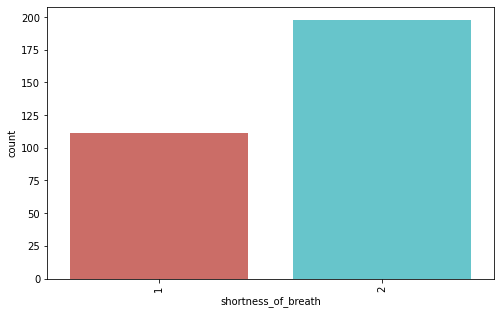

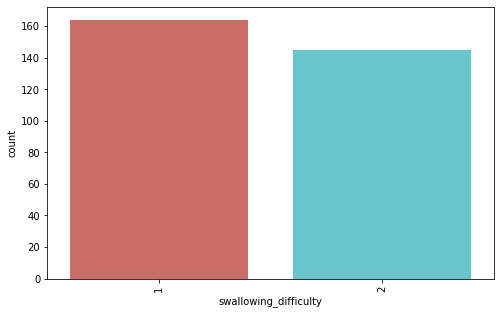

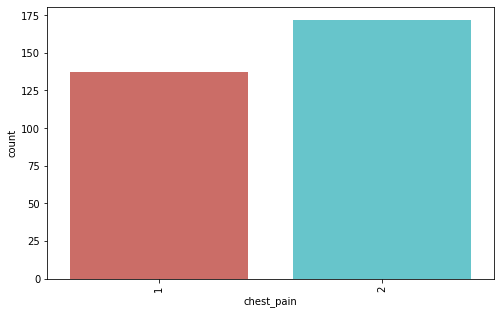

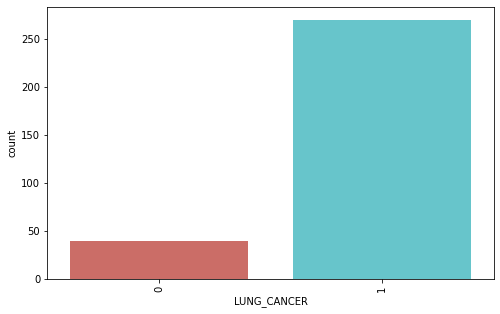

In [121]:
for i in lung_cancer.columns:
    
    plt.figure(figsize = (8,5))
    
    sns.countplot(x = lung_cancer[i], data = lung_cancer, palette = "hls")
    plt.xticks(rotation = 90)

plt.show()
    

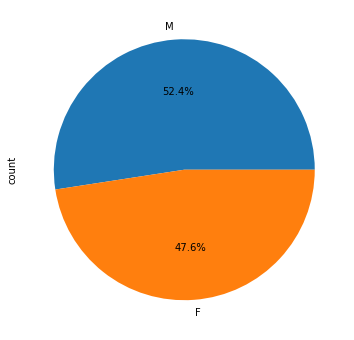

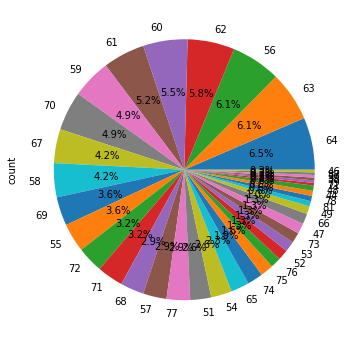

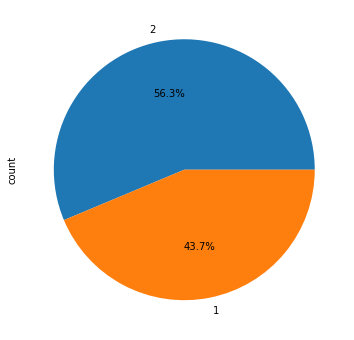

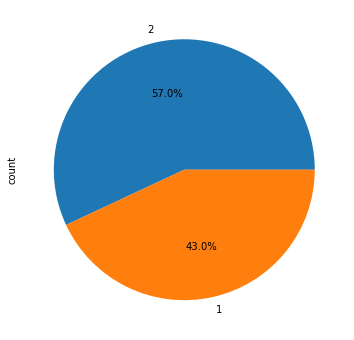

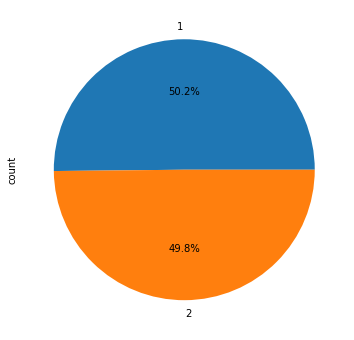

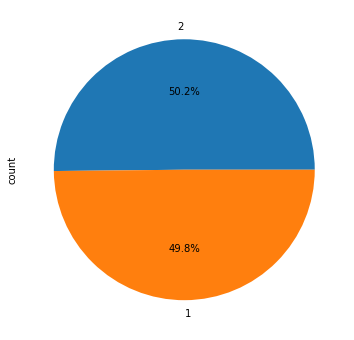

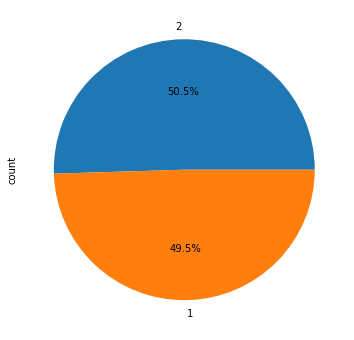

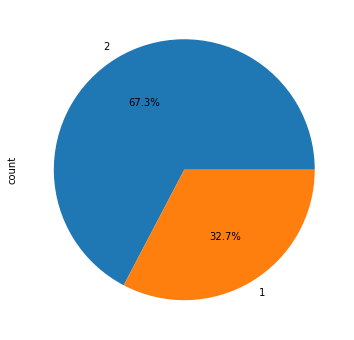

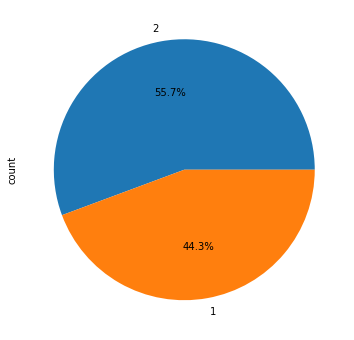

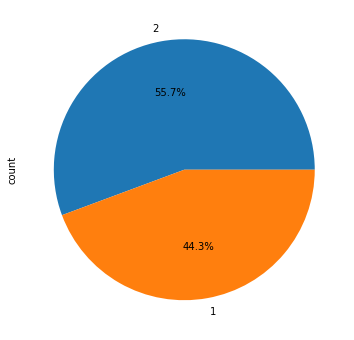

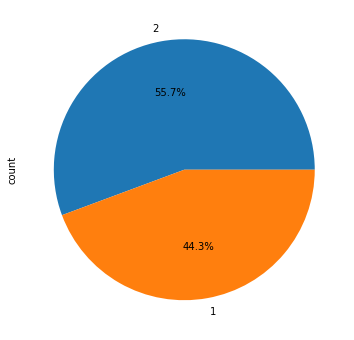

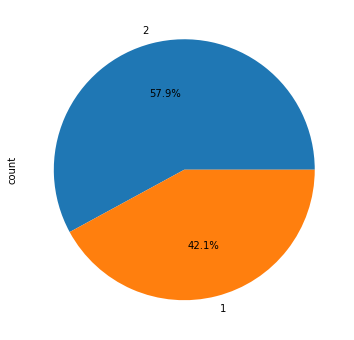

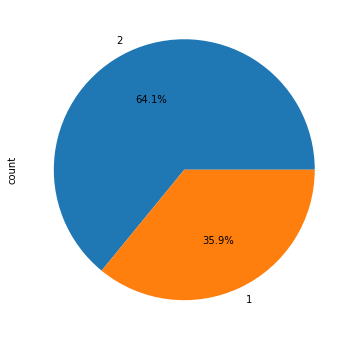

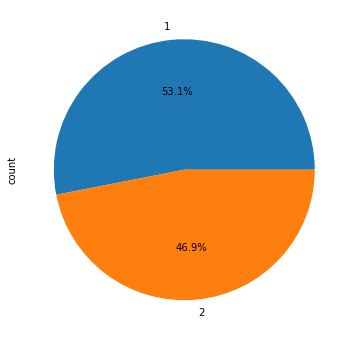

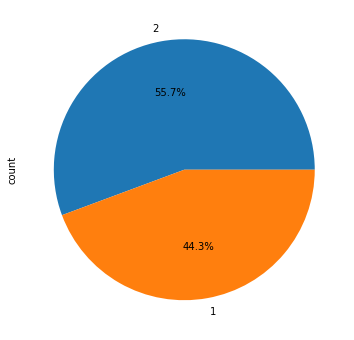

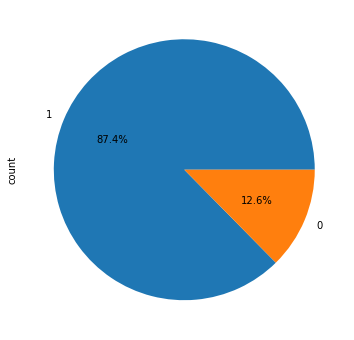

In [122]:
for i in lung_cancer.columns:
    
    lung_cancer[i].value_counts().plot(kind = "pie", figsize = (6,6), autopct = "%1.1f%%")
    plt.xticks(rotation = 45)
    plt.show()

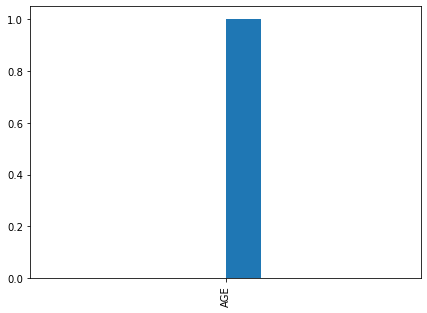

In [123]:
plt.figure(figsize=(7,5))
plt.hist(x = "AGE", data = lung_cancer)
plt.xticks(rotation = 90)
plt.show()

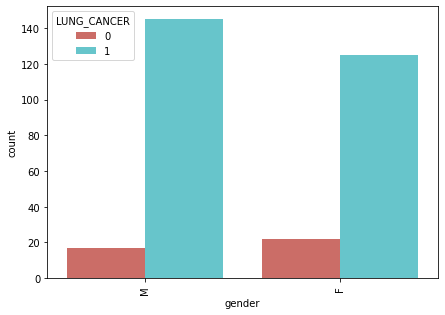

In [124]:
plt.figure(figsize=(7,5))
sns.countplot(x = "gender", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.xticks(rotation = 90)
plt.show()

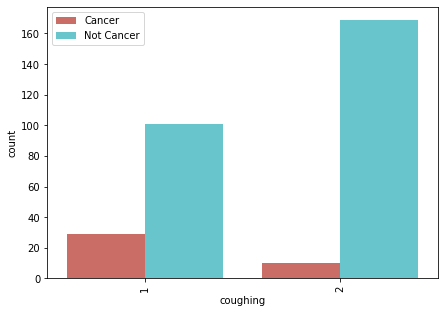

In [125]:
plt.figure(figsize=(7,5))
sns.countplot(x = "coughing", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

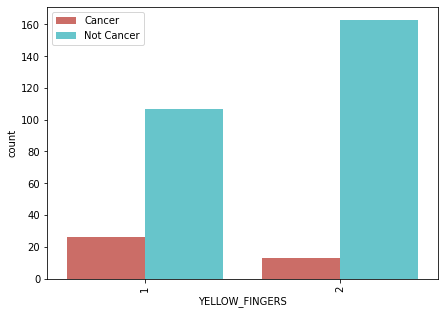

In [126]:
plt.figure(figsize=(7,5))
sns.countplot(x = "YELLOW_FINGERS", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

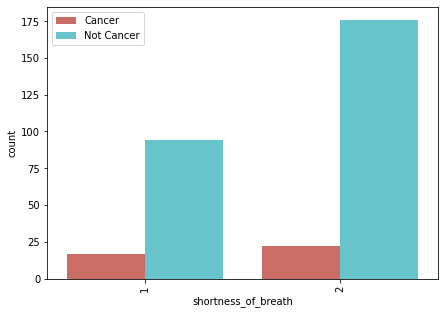

In [127]:
plt.figure(figsize=(7,5))
sns.countplot(x = "shortness_of_breath", data = lung_cancer, hue = "LUNG_CANCER", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

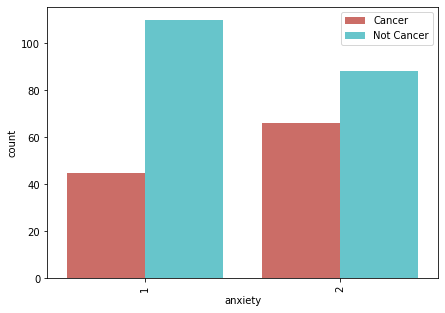

In [128]:
plt.figure(figsize=(7,5))
sns.countplot(x = "anxiety", data = lung_cancer, hue = "shortness_of_breath", palette = "hls")
plt.legend(["Cancer", "Not Cancer"])
plt.xticks(rotation = 90)
plt.show()

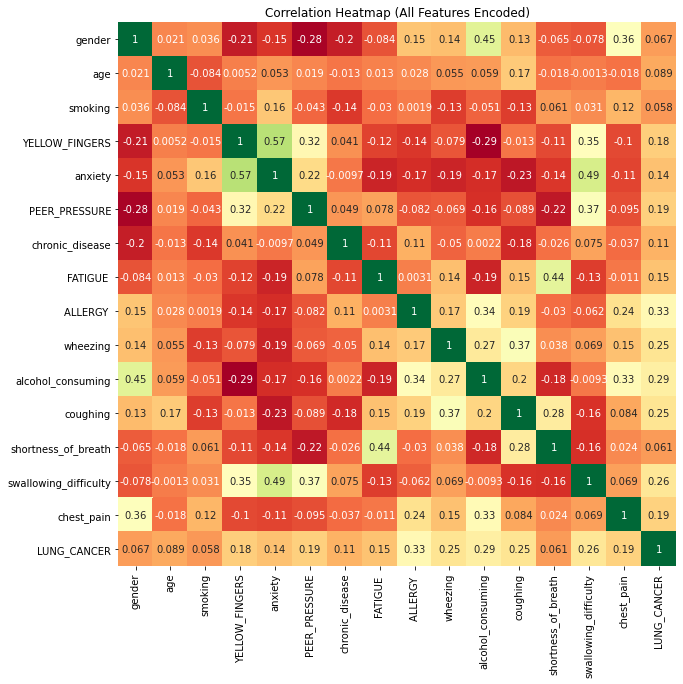

In [129]:
# Example: encode 'Gender' and other categorical features
from sklearn.preprocessing import LabelEncoder

encoded_data = lung_cancer.copy()
for col in encoded_data.select_dtypes(include=['object']).columns:
    encoded_data[col] = LabelEncoder().fit_transform(encoded_data[col])

# Now plot heatmap
plt.figure(figsize=(10,10))
sns.heatmap(encoded_data.corr(), annot=True, cmap="RdYlGn",cbar=False)
plt.title("Correlation Heatmap (All Features Encoded)")
plt.show()


In [130]:
# Encode features
X = lung_cancer.drop('LUNG_CANCER', axis=1)
X = pd.get_dummies(X, drop_first=True)

# Encode target
Y = lung_cancer['LUNG_CANCER'].map({'NO': 0, 'YES': 1})  # or use LabelEncoder


In [131]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assume X was defined as:
#X = lung_cancer.drop(columns=['LUNG_CANCER'])  # or your actual target column name

# Encode categorical columns
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [132]:
print(X)

     age  smoking  YELLOW_FINGERS  anxiety  PEER_PRESSURE  chronic_disease  \
0     69        1               2        2              1                1   
1     74        2               1        1              1                2   
2     59        1               1        1              2                1   
3     63        2               2        2              1                1   
4     63        1               2        1              1                1   
..   ...      ...             ...      ...            ...              ...   
304   56        1               1        1              2                2   
305   70        2               1        1              1                1   
306   58        2               1        1              1                1   
307   67        2               1        2              1                1   
308   62        1               1        1              2                1   

     FATIGUE   ALLERGY   wheezing  alcohol_consuming  coughing 

In [133]:
print(Y)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
304   NaN
305   NaN
306   NaN
307   NaN
308   NaN
Name: LUNG_CANCER, Length: 309, dtype: float64


In [134]:

# Rename columns
X.rename(columns={
    "GENDER": "gender",
    "SMOKING": "smoking",
    "YELLOW FINGERS": "yellow_fingers",
    "ANXIETY": "anxiety",
    "PEER PRESSURE": "peer_pressure",
    "CHRONIC DISEASE": "chronic_disease",
    "FATIGUE": "fatigue",
    "ALLERGY": "allergy",
    "WHEEZING": "wheezing",
    "ALCOHOL CONSUMING": "alcohol_consuming",
    "COUGHING": "coughing",
    "SHORTNESS OF BREATH": "shortness_of_breath",
    "SWALLOWING DIFFICULTY": "swallowing_difficulty",
    "CHEST PAIN": "chest_pain",
    "AGE": "age"
}, inplace=True)


In [135]:
print(X.columns.tolist())

['age', 'smoking', 'YELLOW_FINGERS', 'anxiety', 'PEER_PRESSURE', 'chronic_disease', 'FATIGUE ', 'ALLERGY ', 'wheezing', 'alcohol_consuming', 'coughing', 'shortness_of_breath', 'swallowing_difficulty', 'chest_pain', 'gender_M']


In [136]:
lung_cancer.columns = lung_cancer.columns.str.strip()


# Scalling and Logistic Regression 

In [137]:
# Combine X and y if you've split already
X = lung_cancer.drop('LUNG_CANCER', axis=1)
y = lung_cancer['LUNG_CANCER']

# One-hot encode categorical columns (like 'GENDER', 'SMOKING', etc.)
X_encoded = pd.get_dummies(X, drop_first=True)

# Now split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [138]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

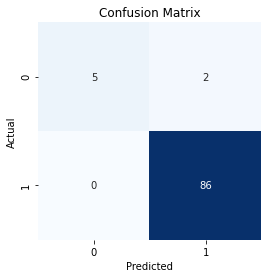

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.98      1.00      0.99        86

    accuracy                           0.98        93
   macro avg       0.99      0.86      0.91        93
weighted avg       0.98      0.98      0.98        93



In [139]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))


# hyper Parameter Tuning

In [140]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [141]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [142]:
### Hyperparameter Tuning for Gradient Boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 7, 10]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)

# Fit the model to the training data using GridSearchCV
grid_search.fit(X_train, y_train)

# To get the best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)



Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Accuracy: 0.9445614035087718


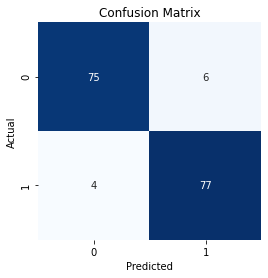

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        81
           1       0.93      0.95      0.94        81

    accuracy                           0.94       162
   macro avg       0.94      0.94      0.94       162
weighted avg       0.94      0.94      0.94       162



In [147]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Fit the model
gb_model.fit(X_train, y_train)

# Predict
y_pred = gb_model.predict(X_test)

# Evaluate

#y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title("Lung Cancer")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))



In [39]:
lung_cancer['LUNG_CANCER'].value_counts()


LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

In [146]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", round(cv_scores.mean() * 100, 2))


Cross-Validation Accuracy Scores: [0.94736842 0.89473684 0.92105263 0.89333333 0.96      ]
Mean CV Accuracy: 92.33


## coding for front end

In [41]:

# Sample input — must be in the same order as feature list
input_values = (1, 56, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1)
#input_values =(1,74,2,1,1,1,2,2,2,1,1,1,2,2,2)

# Column names (must match training exactly)
columns = [
    'gender',
    'age',
    'smoking',
    'YELLOW_FINGERS',
    'anxiety',
    'PEER_PRESSURE',
    'chronic_disease',
    'FATIGUE',
    'ALLERGY',
    'wheezing',
    'alcohol_consuming',
    'coughing',
    'shortness_of_breath',
    'swallowing_difficulty',
    'chest_pain'
]

# Create DataFrame
input_df = pd.DataFrame([input_values], columns=columns)

# Scale the input using the same scaler as training
input_scaled = scaler.transform(input_df)

# Predict
prediction = model.predict(input_scaled)

# Output result
if prediction[0] == 0:
    print("This Person does NOT have Lung Cancer.")
else:
    print("This Person HAS Lung Cancer.")


This Person does NOT have Lung Cancer.


In [42]:
import pickle

# Save the model
model_filename = "../models/lung_cancer_model.sav"
pickle.dump(model, open(model_filename, "wb"))

# Save the scaler
scaler_filename = "../scaler/lung_cancer_scaler.pkl"
pickle.dump(scaler, open(scaler_filename, "wb"))


In [43]:
# Load model
model = pickle.load(open("../models/lung_cancer_model.sav", "rb"))

# Load scaler
scaler = pickle.load(open("../scaler/lung_cancer_scaler.pkl", "rb"))


In [44]:

# Sample input — must be in the same order as feature list
input_values = (1, 56, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1)
#input_values =(1,74,2,1,1,1,2,2,2,1,1,1,2,2,2)

# Column names (must match training exactly)
columns = [
    'gender',
    'age',
    'smoking',
    'YELLOW_FINGERS',
    'anxiety',
    'PEER_PRESSURE',
    'chronic_disease',
    'FATIGUE',
    'ALLERGY',
    'wheezing',
    'alcohol_consuming',
    'coughing',
    'shortness_of_breath',
    'swallowing_difficulty',
    'chest_pain'
]

# Create DataFrame
input_df = pd.DataFrame([input_values], columns=columns)

# Scale the input using the same scaler as training
input_scaled = scaler.transform(input_df)

# Predict
prediction = model.predict(input_scaled)

# Output result
if prediction[0] == 0:
    print("This Person does NOT have Lung Cancer.")
else:
    print("This Person HAS Lung Cancer.")


This Person does NOT have Lung Cancer.


In [45]:
print(X.columns.tolist())

['gender', 'age', 'smoking', 'YELLOW_FINGERS', 'anxiety', 'PEER_PRESSURE', 'chronic_disease', 'FATIGUE', 'ALLERGY', 'wheezing', 'alcohol_consuming', 'coughing', 'shortness_of_breath', 'swallowing_difficulty', 'chest_pain']


In [46]:
for column in X.columns:
    print(column)


gender
age
smoking
YELLOW_FINGERS
anxiety
PEER_PRESSURE
chronic_disease
FATIGUE
ALLERGY
wheezing
alcohol_consuming
coughing
shortness_of_breath
swallowing_difficulty
chest_pain
